In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('potreb.csv')
df.head()

,Код заявки,Дата выдачи,Возраст,Заемщик.Пол,СемейноеПоложение,Иждивенцы,Образование,Вид деятельности,Стаж,Стаж общий,Белый доход,"Месячный доход, руб.","Сумма кредита, тыс. руб.","Месячный платеж, руб.",Просрочек свыше 60 дн.
0,1,2/23/2005,33,Ж,Холост (незамужем),3 и более,Среднее,Наемный работник,От 3 до 5 лет,Свыше 5 лет,нет,11522,104,3671,0
1,2,2/27/2005,33,М,Холост (незамужем),0,Среднее,Наемный работник,От 1 до 3 лет,Свыше 5 лет,да,1131,178,6274,0
2,3,2/28/2005,54,М,Женат (замужем),0,Высшее,Наемный работник,менее 1 года,Свыше 5 лет,нет,7453,68,2346,0
3,4,2/28/2005,30,М,Женат (замужем),1-2,Высшее,Наемный работник,От 3 до 5 лет,Свыше 5 лет,да,14897,109,3902,0
4,5,2/28/2005,22,М,Холост (незамужем),0,Среднее,Наемный работник,От 1 до 3 лет,Свыше 5 лет,да,1191,78,2788,0


In [3]:
df.describe()

,Код заявки,Возраст,"Месячный доход, руб.","Сумма кредита, тыс. руб.","Месячный платеж, руб.",Просрочек свыше 60 дн.
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,534.500000,35.300562,16552.616105,159.842697,4721.619850,0.222846
std,308.449348,8.416107,9507.898829,59.130751,2007.929102,0.416351
min,1.000000,21.000000,0.000000,34.000000,1204.000000,0.000000
25%,267.750000,28.000000,10340.250000,114.000000,3320.500000,0.000000
50%,534.500000,34.000000,14512.000000,151.000000,4305.000000,0.000000
75%,801.250000,41.000000,19744.250000,196.000000,5730.750000,0.000000
max,1068.000000,57.000000,91449.000000,300.000000,22912.000000,1.000000


In [4]:
df.describe(include=['O'])

,Дата выдачи,Заемщик.Пол,СемейноеПоложение,Иждивенцы,Образование,Вид деятельности,Стаж,Стаж общий,Белый доход
count,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,233,2,3,3,2,2,4,4,2
top,2/27/2006,М,Женат (замужем),1-2,Высшее,Наемный работник,От 1 до 3 лет,Свыше 5 лет,нет
freq,15,743,584,567,664,944,480,886,683


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
Код заявки                  1068 non-null int64
Дата выдачи                 1068 non-null object
Возраст                     1068 non-null int64
Заемщик.Пол                 1068 non-null object
СемейноеПоложение           1068 non-null object
Иждивенцы                   1068 non-null object
Образование                 1068 non-null object
Вид деятельности            1068 non-null object
Стаж                        1068 non-null object
Стаж общий                  1068 non-null object
Белый доход                 1068 non-null object
Месячный доход, руб.        1068 non-null int64
Сумма кредита, тыс. руб.    1068 non-null int64
Месячный платеж, руб.       1068 non-null int64
Просрочек свыше 60 дн.      1068 non-null int64
dtypes: int64(6), object(9)
memory usage: 125.2+ KB


In [6]:
target_name = 'Просрочек свыше 60 дн.'

In [7]:
target = df[target_name]
target.value_counts().head(4)

0    830
1    238
Name: Просрочек свыше 60 дн., dtype: int64

In [8]:
df['Иждивенцы'].value_counts()

1-2          567
0            476
3 и более     25
Name: Иждивенцы, dtype: int64

In [9]:
X = df.drop(['Дата выдачи', 'Код заявки', target_name], axis=1)
real_vars = [var for var in X.columns if X[var].unique().size > 4]
real_vars
X = pd.get_dummies(X)
MEANS, VARS, SUPS = X.mean(), X.std(), X.max()
X = X.div(SUPS)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 26 columns):
Возраст                                 1068 non-null float64
Месячный доход, руб.                    1068 non-null float64
Сумма кредита, тыс. руб.                1068 non-null float64
Месячный платеж, руб.                   1068 non-null float64
Заемщик.Пол_Ж                           1068 non-null float64
Заемщик.Пол_М                           1068 non-null float64
СемейноеПоложение_Другое                1068 non-null float64
СемейноеПоложение_Женат (замужем)       1068 non-null float64
СемейноеПоложение_Холост (незамужем)    1068 non-null float64
Иждивенцы_0                             1068 non-null float64
Иждивенцы_1-2                           1068 non-null float64
Иждивенцы_3 и более                     1068 non-null float64
Образование_Высшее                      1068 non-null float64
Образование_Среднее                     1068 non-null float64
Вид деятельности_Наемный 

In [10]:
real_vars

['Возраст',
 'Месячный доход, руб.',
 'Сумма кредита, тыс. руб.',
 'Месячный платеж, руб.']

In [11]:
from sklearn.feature_selection import mutual_info_classif, chi2

In [12]:
Xmutinf = pd.DataFrame({'var':X.columns, 'mutual': mutual_info_classif(X, target)}).sort_values('mutual', ascending=False)
Xmutinf

,mutual,var
13,0.026412,Образование_Среднее
16,0.025094,Стаж_От 1 до 3 лет
17,0.014954,Стаж_От 3 до 5 лет
7,0.010724,СемейноеПоложение_Женат (замужем)
22,0.008212,Стаж общий_От 3 до 5 лет
2,0.006699,"Сумма кредита, тыс. руб."
4,0.002009,Заемщик.Пол_Ж
0,0.001858,Возраст
18,0.000419,Стаж_Свыше 5 лет
24,0.000160,Белый доход_да


In [13]:
Xchi2 = pd.DataFrame(
    np.c_[(X.drop(real_vars, axis=1).columns, *chi2(X.drop(real_vars, axis=1), target))],
    columns=['var', 'chi2', 'p']
).sort_values('p')
Xchi2

,var,chi2,p
2,СемейноеПоложение_Другое,10.6829,0.00108131
17,Стаж общий_От 1 до 3 лет,8.30665,0.00395002
12,Стаж_От 1 до 3 лет,5.32204,0.0210574
18,Стаж общий_От 3 до 5 лет,3.70484,0.0542548
3,СемейноеПоложение_Женат (замужем),3.25432,0.0712354
14,Стаж_Свыше 5 лет,2.56296,0.109394
13,Стаж_От 3 до 5 лет,2.1107,0.146273
20,Белый доход_да,1.8827,0.170027
11,Вид деятельности_Собственное дело,1.47754,0.22416
0,Заемщик.Пол_Ж,1.26111,0.261441


In [14]:
best_feats = set(Xmutinf.loc[Xmutinf.mutual > .01, 'var']).union(set(Xchi2.loc[Xchi2.p < .1, 'var']))
best_feats

{'Образование_Среднее',
 'СемейноеПоложение_Другое',
 'СемейноеПоложение_Женат (замужем)',
 'Стаж общий_От 1 до 3 лет',
 'Стаж общий_От 3 до 5 лет',
 'Стаж_От 1 до 3 лет',
 'Стаж_От 3 до 5 лет'}

In [15]:
from sklearn import decomposition, preprocessing

In [16]:
pca = (
    pd.DataFrame(
        decomposition.PCA(n_components=4)
        .fit_transform(preprocessing.robust_scale(X))
    )
    .add_prefix('PC')
)
pca.head()

,PC0,PC1,PC2,PC3
0,-1.023223,0.483853,0.483572,0.665101
1,-0.854577,1.056182,1.030142,-1.764251
2,-1.522390,-0.759884,-0.101946,-0.162173
3,-0.614799,-0.631704,-0.798878,0.019081
4,-2.227470,1.197764,0.915749,-0.421795


In [17]:
X = pd.concat([pca, X], axis=1)

In [18]:
Xtr, Xte, ytr, yte = sklearn.model_selection.train_test_split(X, target, test_size=.35)

In [19]:
from sklearn import tree, metrics

In [20]:
from sklearn.model_selection import GridSearchCV

In [35]:
clf = GridSearchCV(
    tree.DecisionTreeClassifier(
    ),
    [
        dict(
            criterion=['gini', 'entropy'],
            min_samples_split=list(range(50, 200)),
            class_weight=[None, 'balanced']
        ),
        dict(
            criterion=['gini', 'entropy'],
            min_samples_leaf=list(range(2, 200)),
            class_weight=[None, 'balanced']
        ),
        dict(
            criterion=['gini', 'entropy'],
            max_depth=list(range(2, 4)),
            class_weight=[None, 'balanced']
        ),
    ],
    scoring=['f1_weighted',],
    refit='f1_weighted',
    return_train_score=True,
    cv=4
).fit(Xtr, ytr)
clf.best_params_

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packag

/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/worker/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{'class_weight': None, 'criterion': 'gini', 'min_samples_leaf': 21}

In [36]:
pd.DataFrame(clf.cv_results_).tail()

,mean_fit_time,mean_score_time,mean_test_f1_weighted,mean_train_f1_weighted,param_class_weight,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,...,split1_test_f1_weighted,split1_train_f1_weighted,split2_test_f1_weighted,split2_train_f1_weighted,split3_test_f1_weighted,split3_train_f1_weighted,std_fit_time,std_score_time,std_test_f1_weighted,std_train_f1_weighted
1395,0.003219,0.000611,0.686357,0.712779,None,entropy,3,NaN,NaN,"{'class_weight': None, 'criterion': 'entropy',...",...,0.709169,0.717060,0.689816,0.717060,0.673723,0.704989,0.000080,0.000019,0.014854,0.004948
1396,0.002177,0.000514,0.527755,0.542252,balanced,gini,2,NaN,NaN,"{'class_weight': 'balanced', 'criterion': 'gin...",...,0.503619,0.502670,0.527727,0.455747,0.462813,0.522200,0.000054,0.000007,0.056114,0.087761
1397,0.002413,0.000516,0.590398,0.624590,balanced,gini,3,NaN,NaN,"{'class_weight': 'balanced', 'criterion': 'gin...",...,0.643483,0.646466,0.463268,0.462655,0.670633,0.712766,0.000103,0.000014,0.079757,0.096396
1398,0.002841,0.000578,0.538417,0.556545,balanced,entropy,2,NaN,NaN,"{'class_weight': 'balanced', 'criterion': 'ent...",...,0.503619,0.502670,0.548437,0.501246,0.462813,0.522200,0.000098,0.000033,0.065025,0.083273
1399,0.003250,0.000555,0.574464,0.598185,balanced,entropy,3,NaN,NaN,"{'class_weight': 'balanced', 'criterion': 'ent...",...,0.643483,0.646466,0.548437,0.501246,0.488836,0.556639,0.000101,0.000071,0.060136,0.073470


In [37]:
metrics.roc_curve(yte, clf.predict(Xte))

(array([ 0.        ,  0.11371237,  1.        ]),
 array([ 0. ,  0.2,  1. ]),
 array([2, 1, 0]))

In [38]:
sklearn.metrics.explained_variance_score(yte, clf.predict(Xte))

-0.53756967670011147

In [39]:
print(sklearn.metrics.classification_report(yte, clf.predict(Xte)))

             precision    recall  f1-score   support

          0       0.82      0.89      0.85       299
          1       0.31      0.20      0.24        75

avg / total       0.71      0.75      0.73       374



In [40]:
metrics.accuracy_score(yte, clf.predict(Xte))

0.74866310160427807

In [41]:
sklearn.metrics.confusion_matrix(yte, clf.predict(Xte))

array([[265,  34],
       [ 60,  15]])

In [42]:
import graphviz

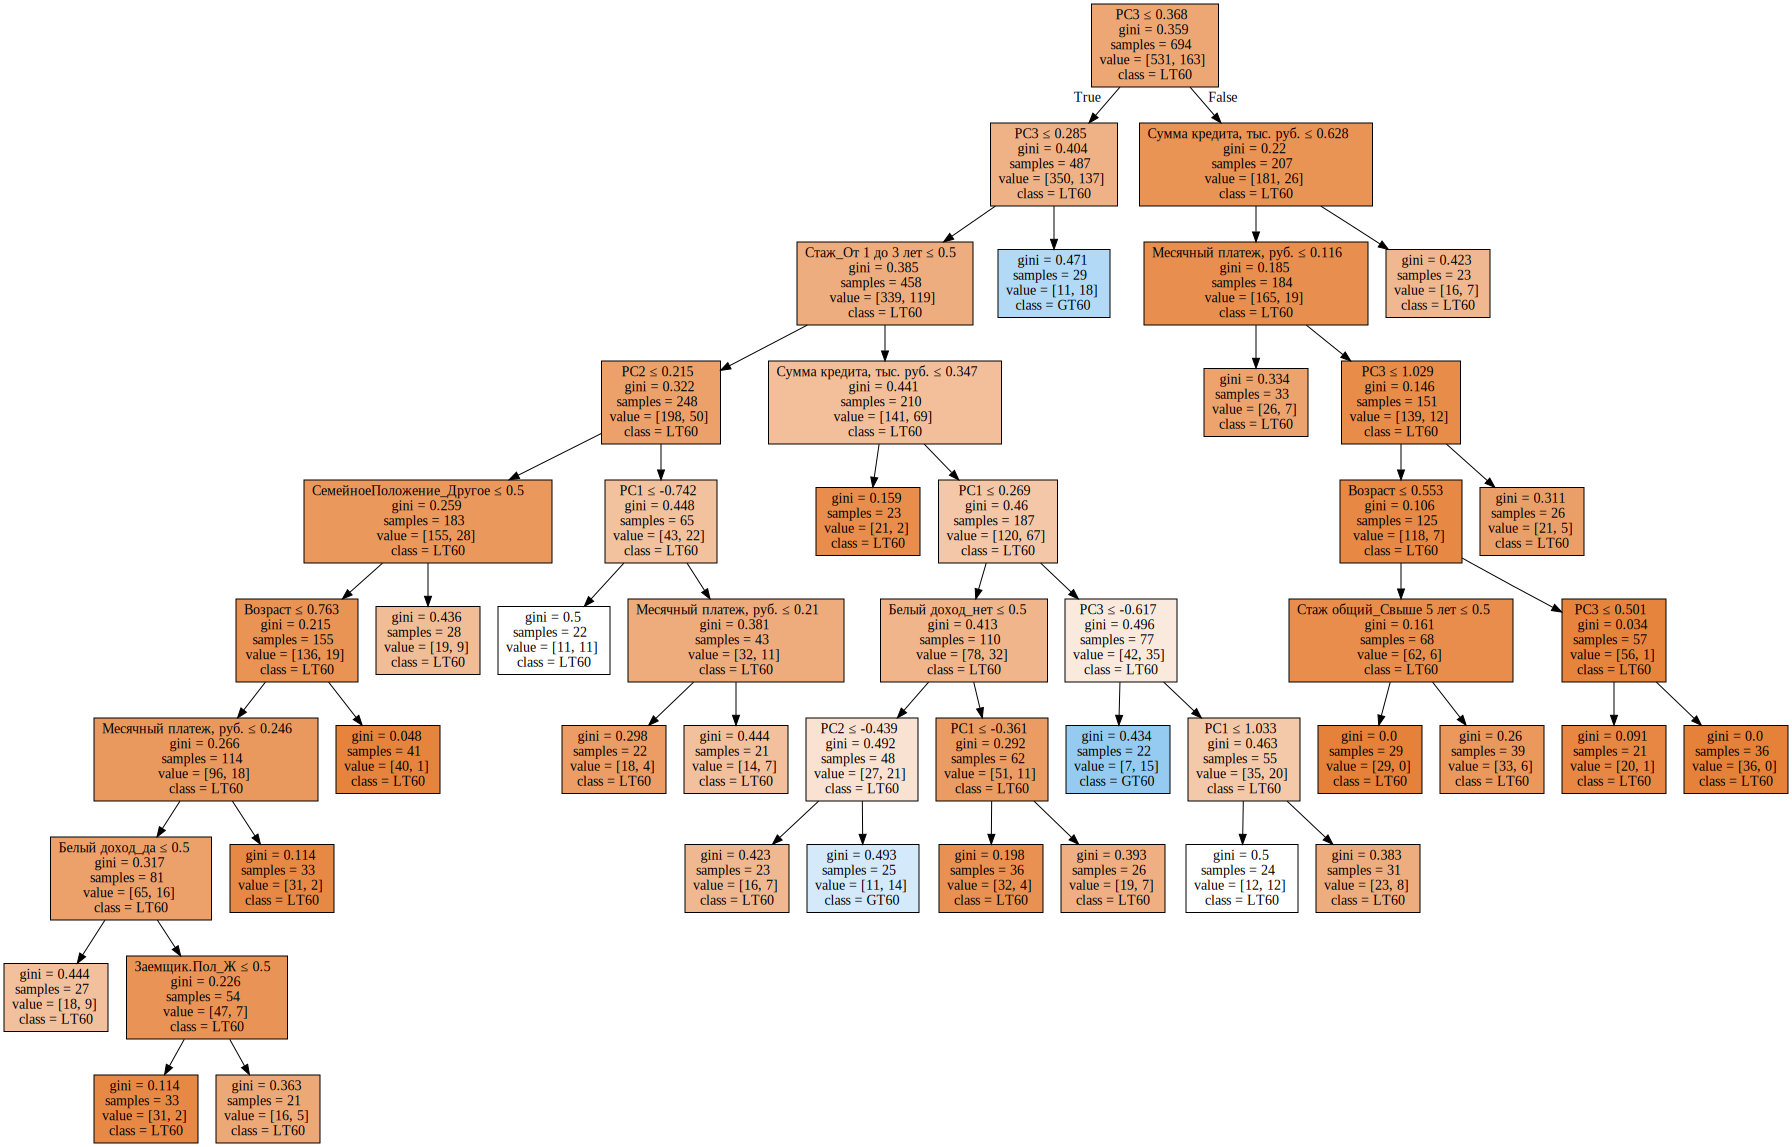

In [43]:
clfdot = tree.export_graphviz(
    clf.best_estimator_,
    out_file=None,
    feature_names=X.columns,
    filled=True,
    special_characters=True,
    class_names=['LT60', 'GT60']
)
graphviz.Source(clfdot)

In [44]:
t = clf.best_estimator_.fit(Xtr, ytr)

In [45]:
metrics.accuracy_score(yte, t.predict(Xte))

0.74866310160427807

In [46]:
sklearn.metrics.confusion_matrix(yte, t.predict(Xte))

array([[265,  34],
       [ 60,  15]])

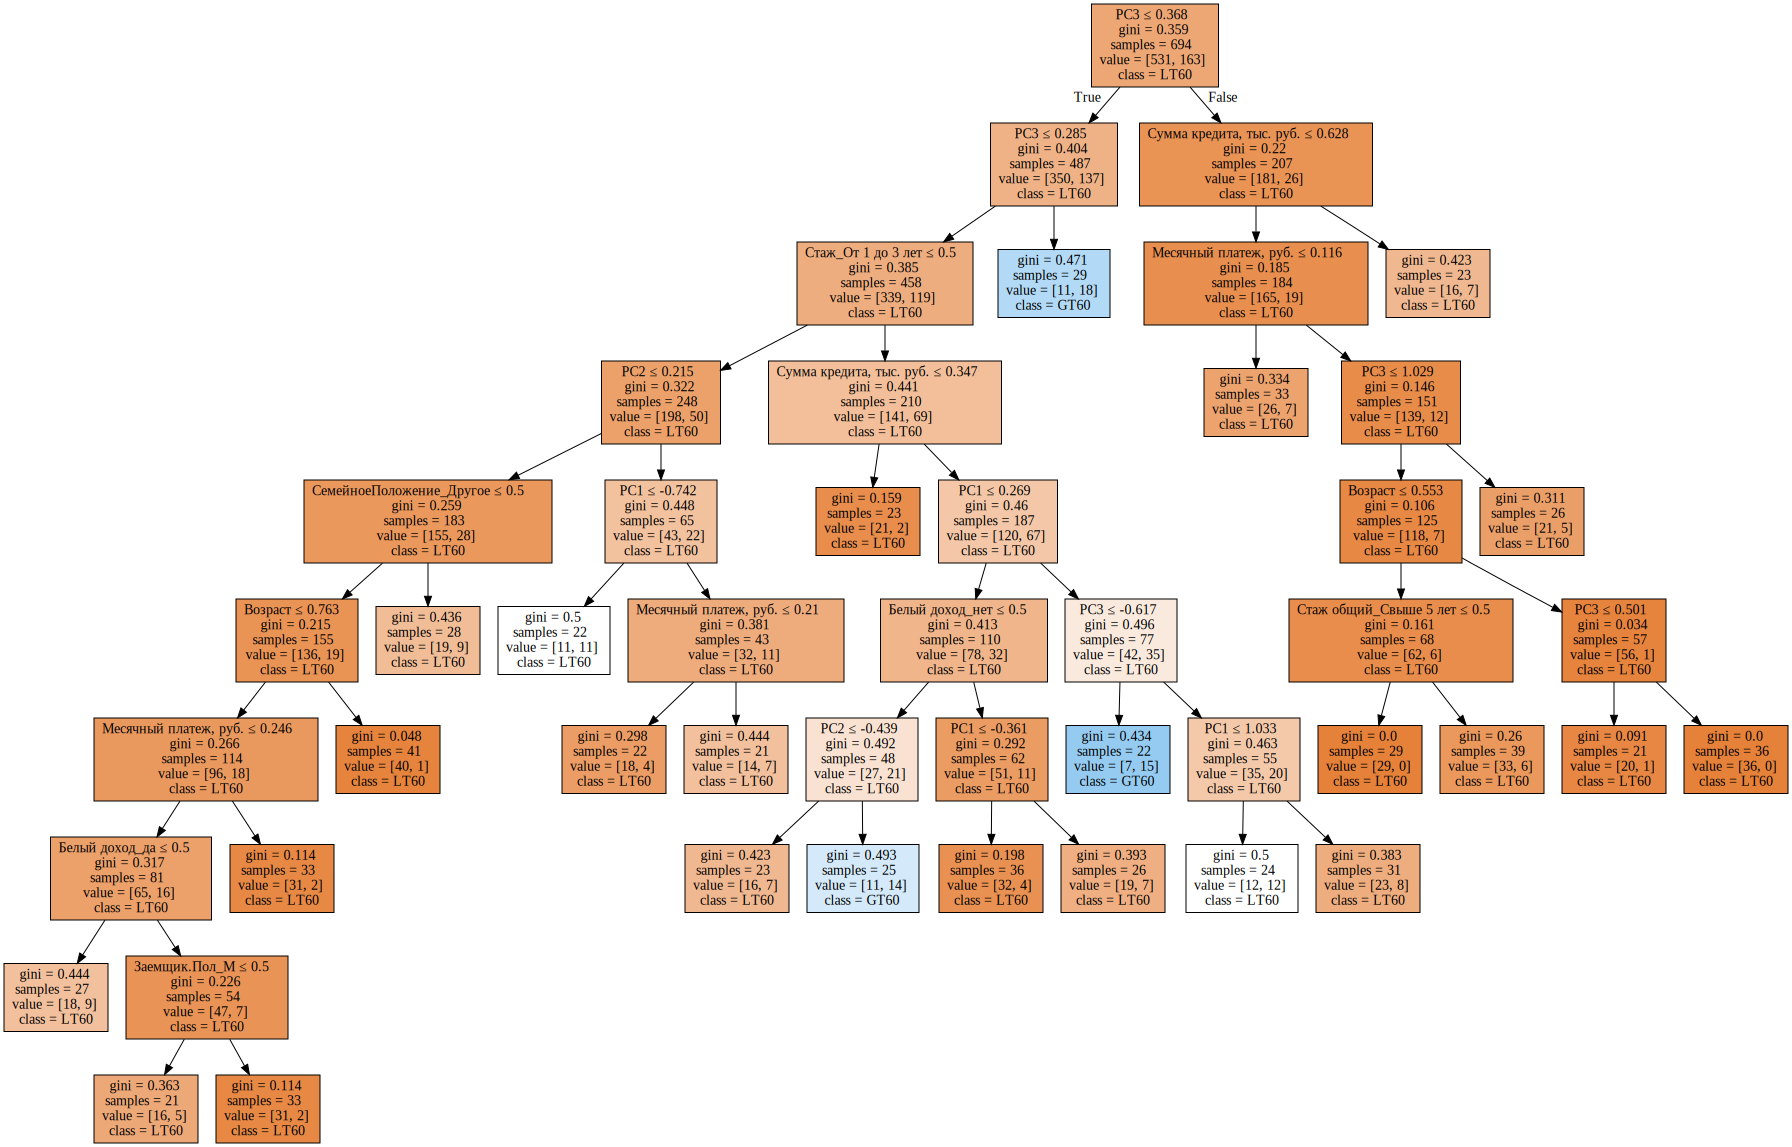

In [47]:
clfdot = tree.export_graphviz(
    t,
    out_file=None,
    feature_names=X.columns,
    filled=True,
    special_characters=True,
    class_names=['LT60', 'GT60']
)
graphviz.Source(clfdot)